# Programming Exercise: Working with Text Data

## Working with Text Data

In this exercise, you will work with text data. Text data is usually represented as strings, made up of characters with variable length. This feature is clearly very different from the numeric features and we will need to process the data before we can apply our machine learning algorithms to it.

## Applying Bag-of-Words to a Toy Dataset

To construct a bag-of-words model based on the word counts in the respective documents, we can use the <samp>CountVectorizer</samp> class implemented in scikit-learn. As we will see in the following code section, the <samp>CountVectorizer</samp> class takes an array of text data, which can be documents or just sentences, and constructs the bag-of-words model for us: 

In [25]:
#Text data and Building Vocabulary
import numpy as np
docs = np.array([
    'The sun is shining',
    'The weather is sweet',
    'The sun is shining the weather is sweet and one and one is two'])

from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count.fit(docs)
print("Vocabulary size: {}". format(len(count.vocabulary_)))
print("Vocabulary content:\n {}".format(count.vocabulary_))

Vocabulary size: 9
Vocabulary content:
 {'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}


Fitting the <samp>CountVectorizer</samp> consists of the tokenization of the training data and building of the vocabulary, which we can access as the vocabulary\_ attribute. In this case the vocabulary consists of 9 words.

To create the bag-of-words representation for the training dataset, we call the <samp>transform</samp> method:

In [26]:
#To create the bag-of-words representation
bag = count.transform(docs)
#Repr returns a string containing a printable representation of an object. 
print("Bag of words: {}".format(repr(bag)))
print("Dense representation of Bag of word:\n {}". format(bag.toarray()))

Bag of words: <3x9 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>
Dense representation of Bag of word:
 [[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


The bag-of-words representation is stored in a sparse matrix that only stores the entries that are nonzero. A sparse matrix is used as most documents only contain a small subset of the words in the vocabulary. 

In the dense representation we have a bidimensional array of shape=*(number of sentences, number of words in vocabulary)*. In this case the element *(i, j)* of the array is the multiplicity of the word of the vocabulary with index *j* in the sentence *i*. For example, the first feature at index position 0 of the first raw resembles the count of the word "and", which only occurs in the last sentence, while the word "is" at the index position 1 (the 2nd feature in the vocabulary) occurs in all the three sentences, and in particular 3 times in the third.



## Example Application: Sentiment Analysis of Movie Reviews

In this exercise, we will use a dataset of movie reviews from the IMDb (Internet Movie Database). This dataset contains the text of the reviews, together with a label that indicates whether a review is "positive" or "negative".

First, upload Train and Test data to server.

Next, import data using `pandas`, a Python Data Analysis Library

In [27]:
#Movie reviews Dataset
import pandas as pd
train = pd.read_csv('http://ailab.uniud.it/wp-content/uploads/2019/05/Train_Movie_Data.csv')
print("First Elements of train set:\n {}".format(train.head(3)))
text_train = train['review'].values
y_train = train['sentiment'].values
test = pd.read_csv('http://ailab.uniud.it/wp-content/uploads/2019/05/Test_Movie_Data.csv')
print("First Elements of test set:\n {}".format(test.head(3)))
text_test = test['review'].values
y_test = test['sentiment'].values

First Elements of train set:
                                               review  sentiment
0  In 1974, the teenager Martha Moxley (Maggie Gr...          1
1  OK... so... I really like Kris Kristofferson a...          0
2  ***SPOILER*** Do not read this, if you think a...          0
First Elements of test set:
                                               review  sentiment
0  I have seen several comments here about Brando...          1
1  I liked this film very much. The story jumps b...          1
2  There's a part of me that would like to give t...          0


Now, you will build the vocabulary and the bag-of-word representation of the <samp>text\_train</samp>.

#### Implementation Notes:
<ul>
    <li> Use the Class <samp>CountVectorizer</samp></li>
    <li> Build the vocabulary using the training set </li>
    <li> Compute the bag-of-words representation of <samp>text_train</samp> into <samp>X_train</samp> </li> 
    <li> Print the shape of <samp>X_train</samp> using: <samp>print("X_train:\n{}".format(repr(X_train)))</samp> </li>
</ul>

In [28]:
#Building the vocabulary and the bag of words
# HERE YOUR CODE
count = CountVectorizer()
count.fit(text_train)
X_train = count.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<24998x76850 sparse matrix of type '<class 'numpy.int64'>'
	with 3408338 stored elements in Compressed Sparse Row format>


The shape of <samp>X_train</samp> is $24998\times76850$, indicating that the vocabulary contains 76,850 entries.

Let's look at the vocabulary in a bit more detail. 

In [29]:
#Let's look at the vocabulary in a bit more detail.
feature_names = count.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 20 features:\n{}".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}".format(feature_names[20400:20430]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

Number of features: 76850
First 20 features:
['00', '000', '0000000000001', '00000001', '00015', '001', '007', '0079', '007s', '0080', '0083', '009', '0093638', '00am', '00o', '00pm', '00s', '01', '0148', '02']
Features 20010 to 20030:
['dozor', 'doña', 'doğan', 'dp', 'dpm', 'dpp', 'dq', 'dr', 'draaaaaaaawl', 'draaaaaags', 'drab', 'drablow', 'drably', 'drabness', 'drac', 'dracht', 'dracula', 'draculas', 'draft', 'drafted', 'draftee', 'draftees', 'drafthouse', 'drafting', 'drafts', 'drag', 'dragan', 'dragged', 'dragging', 'draggy']
Every 2000th feature:
['00', 'affiliation', 'approxiately', 'barbara', 'blobs', 'buoyancy', 'charitable', 'commentors', 'crippling', 'demotic', 'dolous', 'elysee', 'eyelid', 'follows', 'ghettos', 'gwyenths', 'hogue', 'indefinitely', 'jessie', 'kramp', 'liz', 'marketability', 'ministrations', 'nakedly', 'offsetting', 'pater', 'poiter', 'punishes', 'reimbursed', 'rosyton', 'seamen', 'single', 'spleen', 'sumida', 'testicle', 'triggered', 'unromantic', 'wanderlus

As you can see, possibly a bit surprisingly, the first 20 entries in the vocabulary are all numbers. All these numbers appear somewhere in the reviews, and are therefore extracted as words. 

Once we have our feature, let's obtain a qualitative measure of performance by actually building a classifier. We have the training labels stored in <samp>y_train</samp> and the bag-of-words representation of the training data in <samp>X_train</samp>, so we can train a classifier on this data. For high-dimensional, sparse data like this, linear models like <samp>LogisticRegression</samp> could work best. 

Let's start by evaluating <samp>LogisticRegression</samp>:

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
# HERE YOUR CODE 
#Use fit(X,y) fuction of LogisticRegression()to train your model, 
#where X is the array of your training data and y is the label 
logreg.fit(X_train, y_train)

# Compute the Bag of word representation of the testing set
# HERE YOUR CODE
X_test = count.transform(text_test)

# HERE YOUR CODE
#Use score(X,y) function of LogisticRegression() to compute 
#the performance on both training and testing set 
print("Train score: {:.2f}".format(logreg.score(X_train, y_train)))
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))


Train score: 1.00
Test score: 0.89


Based on these results we can see our model overfit the data. The LogisticRegression has a regularization parameter, C, which can tune, via a grid search strategy, to reduce the overfitting effect.

In [31]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
#For computation issue in this laboratory we test just one case  
param_grid = {'C': [0.1]}

def grid_search(X_train,y_train,X_test,y_test,param_grid):
    grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score: {:.2f}".format(grid.best_score_))
    print("Best parameters: ", grid.best_params_)
    # Test on the Testing set
    print("Test score: {:.2f}".format(grid.score(X_test, y_test)))
    return grid


grid_search(X_train, y_train, X_test, y_test, param_grid)

Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}
Test score: 0.89


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

We obtain an accuracy of 89%, which indicates reasonable performance for a balanced binary classification task. Note the accuracy on the test set is the same of the previous test, but now the model does not overfit.

### Word with Multiple Appearances

To clean the vocabulary from no-meaningful "words" we can use a simple mechanism that works quite well in practice: only use tokens that appear only at least two documents (or at least five documents, and so on). A token that appears only in a single document is unlikely to appear in the test set and is therefore not helpful. We can set the minimum number of documents a token needs to appear in with the <samp>min\_df</samp> parameter (see below).

By requiring at least five appearances of each token, we can bring down the number of feature to 27,039 - only about a third of the original features. There are clearly many fewer numbers, and some of the more obscure words seem to have vanished. 

The validation accuracy is unchanged from before. We did not improve our model, but having fewer features to deal with speeds up processing and throwing away useless features might make the model more interpretable. 

In [34]:
#1) Set minimum number of documents a token needs to appear
#Building the vocabulary and the bag of words
# HERE YOUR CODE
count = CountVectorizer(min_df=5)
count.fit(text_train)
X_Train = count.transform(text_train)

print("X_train with min_df: {}".format(repr(X_train)))
feature_names = count.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print("First 50 features:\n{}".format(feature_names[:50]))

X_test = count.transform(text_test)
grid_search(X_train,y_train, X_test, y_test,param_grid)

X_train with min_df: <24998x76850 sparse matrix of type '<class 'numpy.int64'>'
	with 3408338 stored elements in Compressed Sparse Row format>
Number of features: 27039
First 50 features:
['00', '000', '007', '01', '02', '03', '05', '06', '07', '08', '09', '10', '100', '1000', '100s', '100th', '101', '102', '103', '104', '105', '107', '108', '109', '10s', '10th', '11', '110', '111', '115', '116', '117', '11th', '12', '120', '1200', '123', '12th', '13', '130', '13th', '14', '140', '14th', '15', '150', '15th', '16', '160', '16mm']
Best cross-validation score: 0.89
Best parameters:  {'C': 0.1}


ValueError: X has 27039 features per sample; expecting 76850

### Advanced Tokenization

The <samp>CountVectorize</samp> is relatively simple, but it could be improved using external methods.
One particular step that is often improved in more sophisticated text-processing applications is the first step in the bag-of-words model: tokenization. This step defines what constitutes a word for the purpose of feature extraction. 
We saw earlier that the vocabulary often contains singular and plural version of some words: "drawback" and "drawbacks" or "dracula" and "draculas". For the purposes of a bag-of-words model, the semantics of "drawback" and "drawbacks" are so close that distinguishing them will only increase overfitting, and not allow the model to fully exploit the training data. 

This problem can be overcome by representing each word using its <samp>word stem</samp>, which involves identifying all the words that have the same word stem. If this is done by using a rule-based heuristic, like dropping common suffixes, it is usually referred to as <samp>stemming</samp>. If instead a dictionary of known word is used, and the role of the word in
the sentence is taken into account, the process is referred to as <samp>lemmatization</samp> and the standardized form of the word is referred to as the <samp>lemma</samp>.
However, <samp>lemmatization</samp> is computationally more difficult and expensive compared to <samp>stemming</samp> and it could have little impact on the performance. 
The Natural Language Toolkit for Python (NLTK, http://www.nltk.org) implements the Snowball stemming algorithm, which we will use in the following code section.

In [36]:
# Here the Advanced Italian Tokenization  
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("italian")
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("È possibile attivare la consultazione e la ricerca nei testi anche basate sulla lemmatizzazione")

['è',
 'possibil',
 'attiv',
 'la',
 'consult',
 'e',
 'la',
 'ricerc',
 'nei',
 'test',
 'anche',
 'bas',
 'sull',
 'lemmatizz']

In [37]:
# Here the Advanced English Tokenization
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def tokenizer_snowballStemmer(text):
    return [stemmer.stem(word) for word in text.split()]

tokenizer_snowballStemmer("runners like running and thus they run")

['runner', 'like', 'run', 'and', 'thus', 'they', 'run']

Using the Snowball stemmer from the nltk package, we can classify the movie reviews.

In [38]:
#Classification with Tokenizer NLTK
nltk_count = CountVectorizer(tokenizer=tokenizer_snowballStemmer, min_df=5).fit(text_train)
X_train_nltk = nltk_count.transform(text_train)
print("X_train_nltk: {}".format(X_train_nltk.shape))

X_test_nltk = nltk_count.transform(text_test)
grid_search(X_train_nltk,y_train,X_test_nltk, y_test,param_grid)

c:\users\kevin\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train_nltk: (24998, 34755)
Best cross-validation score: 0.88
Best parameters:  {'C': 0.1}
Test score: 0.88


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Rescaling the Data with tf-idf

One of the most common approach to represent text is using <i>term frequency-inverse document frequency</i> (tf-idf) method. The intuition of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus. If a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document. <i>scikit-learn</i> implements the tf-idf method in a class: <samp>TfidfVectorizer</samp>, which takes in the text data and does both the bag-of-words feature extraction and the tf-idf transformation. There are several variants of the tf-idf rescaling schema (see wikipedia). The tf-idf score for word $w$ in document $d$ as implemented in <samp>TfidfVectorizer</samp> class is given by: 
\begin{equation}
 tfidf(w,d) = tf * \left(\ln\left( \frac{N+1}{N_w+1}\right)+1\right)
\end{equation}
where $N$ is the number of documents in the training set, $N_w$ is the number of documents in the training set that the word $w$ appears, and $tf$ (the term frequency) is the number of times that the word $w$ appears in the query document $d$ (the document you want to transform or encode). The class also applies L2 normalization after computing the tf-idf representation; in other words, it rescales the representation of each document to have Euclidean length (this simply means each row is divided by its sum of squared entries). Rescaling in this way means that the length of a document (the number of words) does not change the vectorized representation. Test it completing the function <samp>tf_id_example</samp> using the following code. 

In [39]:
docs = np.array([
        'The sun is shining',
        'The weather is sweet',
        'The sun is shining the weather is sweet and one and one is two'])

from sklearn.feature_extraction.text import TfidfVectorizer
count = TfidfVectorizer()
count.fit(docs)
print("Vocabulary size: {}". format(len(count.vocabulary_)))
print("Vocabulary content:\n {}".format(count.vocabulary_))

#To create the bag-of-words representation
bag = count.transform(docs)
print("Bag of words: {}".format(repr(bag)))
print("Dense representation of Bag of word:\n {}". format(bag.toarray()))

Vocabulary size: 9
Vocabulary content:
 {'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
Bag of words: <3x9 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>
Dense representation of Bag of word:
 [[0.         0.43370786 0.         0.55847784 0.55847784 0.
  0.43370786 0.         0.        ]
 [0.         0.43370786 0.         0.         0.         0.55847784
  0.43370786 0.         0.55847784]
 [0.50238645 0.44507629 0.50238645 0.19103892 0.19103892 0.19103892
  0.29671753 0.25119322 0.19103892]]


Now, you will adapt this code for the movie reviews dataset. 
Keep in mind that the tf-idf scaling is meant to find words that distinguish documents, but it is a purely unsupervised technique. So, "important" here does not necessarily relate to the "positive review" and "negative review" label we are interested in.

In [41]:
countTFIDF = TfidfVectorizer(min_df=5,tokenizer=tokenizer_snowballStemmer).fit(text_train)
#HERE YOUR CODE
#Building TF-IDF bag of word representation
XTFIDF_train = countTFIDF.transform(text_train)
XTFIDF_test = countTFIDF.transform(text_test)
print("X_train:\n{}".format(repr(XTFIDF_train)))

grid=grid_search(XTFIDF_train, y_train, XTFIDF_test, y_test,param_grid)

c:\users\kevin\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


X_train:
<24998x34755 sparse matrix of type '<class 'numpy.float64'>'
	with 3334902 stored elements in Compressed Sparse Row format>
Best cross-validation score: 0.84
Best parameters:  {'C': 0.1}
Test score: 0.84


### Investigating Model Coefficients

Finally, let's look in a bit more detail into what our logistic regression model actually learned from the data. Because there are so many features we clearly cannot look at all of the coefficients at the same time. 
However, we can look at the largest coefficients, and see which words these correspond to. 

The following bar char show the largest and smallest coefficients of the logistic regression model.

Features wtih lowest idf:
['the' 'a' 'and' 'of' 'to' 'is' 'this' 'it' 'in' 'that' 'i' 'for' 'but'
 'with' 'was' 'as' 'be' 'on' 'have' '/><br' 'movi' 'not' 'are' 'one'
 'film' 'at' 'you' 'an' 'like' 'all' 'from' 'by' 'who' 'so' 'his' 'just'
 'they' 'if' 'about' 'has' 'he' 'or' 'there' 'out' 'some' 'what' 'make'
 'when' 'see' 'get' 'more' 'veri' 'watch' 'even' 'good' 'onli' 'would'
 'can' 'my' 'up' 'no' 'time' 'had' 'realli' 'which' 'their' 'charact'
 'than' 'other' 'most' 'do' 'were' 'been' 'stori' 'much' 'look' 'will'
 'into' 'go' 'becaus' 'how' 'her' "don't" 'think' 'first' 'could' 'also'
 'great' 'me' 'ani' 'peopl' 'scene' 'made' 'after' 'love' 'play' '/>the'
 'thing' 'she' 'act']


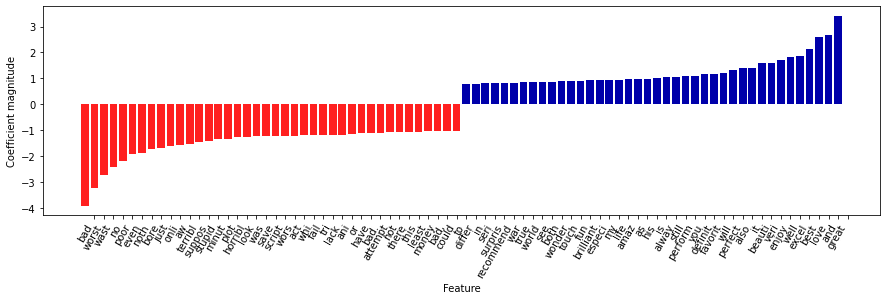

In [42]:
# Show coefficients
################################################################################
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
cm = ListedColormap(['#0000aa', '#ff2020'])


def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = [cm(1) if c < 0 else cm(0)
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

###############################################################################

feature_names = np.array(countTFIDF.get_feature_names())
sorted_by_idf = np.argsort(countTFIDF.idf_)
print("Features wtih lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))


import matplotlib.pyplot as plt
visualize_coefficients(
        grid.best_estimator_.coef_,
        feature_names, n_top_features=40)

plt.show()

The negative coefficients on the left belong to words that according to the model are indicative of negative reviews, while the positive coefficients on the right belong to words that according to the model indicate positive reviews. Most of the terms are quite intuitive, like "worst", "bad" indicating bad movie reviews, while "great", "enjoy" indicate positive movies reviews. 
The <i>mglearn</i> is a library for plotting data.